In [42]:
%load_ext autoreload

%autoreload 2

import utils as utl
from pathlib import Path
import matplotlib.pylab as plt

path_name = './flywire_ids_630.xlsx'
path_comp = './2023_03_23_completeness_630_final.csv'
path_con = './2023_03_23_connectivity_630_final.parquet'

# sheet names of the xls file to include
sheets_pair = [ # pair of neurons (left+right per row)
    'stop',
    'walk',
    'walk_outputs',
    # 'SEZ',
    ]
sheets_single = [ # single neurons (one per row)
    'sugar', 
    'ovidn', 
    'bitter', 
    'water', 
    'jo_e', 
    'jo_f', 
    'eye_bristle', 
    ]

name2flyid = utl.create_name_dict(path_name, path_comp, sheets_pair, sheets_single)

names = [ *name2flyid.keys() ]

# lists of neuron groups
# walk neurons
l_p9 =      ['P9_l', 'P9_r'] 
l_mdn =     ['MDN_a_l', 'MDN_a_r', 'MDN_b_l', 'MDN_b_r']
l_bpn1 =    [ i for i in names if i.startswith('BPN_1') ]
l_bpn2 =    [ i for i in names if i.startswith('BPN_2') ]
l_bpn3 =    [ i for i in names if i.startswith('BPN_3') ]
l_bpn4 =    [ i for i in names if i.startswith('BPN_4') ]
l_bpn = l_bpn1 + l_bpn2 + l_bpn3 + l_bpn4

# stop neurons
l_bb =      ['BB_r', 'BB_l'] 
l_fg =      ['FG_r', 'FG_l']
l_man1 =    ['MAN-1_r', 'MAN-1_l']
l_stop1 =   ['STOP-1_a_r', 'STOP-1_a_l', 'STOP-1_b_r', 'STOP-1_b_l', 'STOP-1_c_r', 'STOP-1_c_l']

# sensory neurons
l_sugarr =  [ i for i in names if i.startswith('sugar_r_') ] # sugar
l_sugarl =  [ i for i in names if i.startswith('sugar_l_') ]
l_ovidn =   [ i for i in names if i.startswith('OviDN_') ] # OviDNs
l_bitterr = [ i for i in names if i.startswith('bitter_r_') ] # bitter
l_bitterl = [ i for i in names if i.startswith('bitter_l_') ]
l_waterr =  [ i for i in names if i.startswith('water_r_') ] # water
l_waterl =  [ i for i in names if i.startswith('water_l_') ]
l_joe =     [ i for i in names if i.startswith('JO_E') ] # JO E
l_jof =     [ i for i in names if i.startswith('JO_F') ] # JO E
l_eye =     [ i for i in names if i.startswith('eye_bristle_') ] # eye bristle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
INFO: Loaded sheets ...
      ... stop
      ... walk
      ... walk_outputs
      ... sugar
      ... ovidn
      ... bitter
      ... water
      ... jo_e
      ... jo_f
      ... eye_bristle

INFO: All names are unique

INFO: All IDs are unique

Declared 855 names for neurons

INFO: IDs appear to match with ./2023_03_23_completeness_630_final.csv



# Calculate Rates

In [2]:
root = Path('./results/coac/')
ps = root.glob('**/*.parquet')

df_spkt = utl.load_exps(ps)
df_rate, df_std = utl.get_rate(df_spkt, duration=1)

df_rate = utl.rename_index(df_rate, name2flyid)
df_std = utl.rename_index(df_std, name2flyid)

utl.save_xls(df_rate, root / 'rate_all.xls')
utl.save_xls(df_std, root / 'rate_std_all.xls')

KeyboardInterrupt: 

In [23]:
root = Path('./results/coac/')
sub = { p.parent for p in root.glob('**/*.parquet') }

for f in sub:

    ps = f.glob('*.parquet')

    df_spkt = utl.load_exps(ps)
    df_rate, df_std = utl.get_rate(df_spkt, duration=1)

    df_rate = utl.rename_index(df_rate, name2flyid)
    df_std = utl.rename_index(df_std, name2flyid)

    utl.save_xls(df_rate, f / 'rate.xls')
    utl.save_xls(df_std, f / 'rate_std.xls')

INFO: saving 74 experiments to results\coac\walk-walk\p9-mdn\rate.xls
INFO: saving 74 experiments to results\coac\walk-walk\p9-mdn\rate_std.xls
INFO: saving 4 experiments to results\coac\stop\rate.xls
INFO: saving 4 experiments to results\coac\stop\rate_std.xls
INFO: saving 16 experiments to results\coac\walk\rate.xls
INFO: saving 16 experiments to results\coac\walk\rate_std.xls
INFO: saving 70 experiments to results\coac\sens-walk\rate.xls
INFO: saving 70 experiments to results\coac\sens-walk\rate_std.xls
INFO: saving 47 experiments to results\coac\walk-stop\rate.xls
INFO: saving 47 experiments to results\coac\walk-stop\rate_std.xls
INFO: saving 13 experiments to results\coac\sens\rate.xls
INFO: saving 13 experiments to results\coac\sens\rate_std.xls


# Plot Results

## raster plots

INFO: setting figsize to (24, 4)


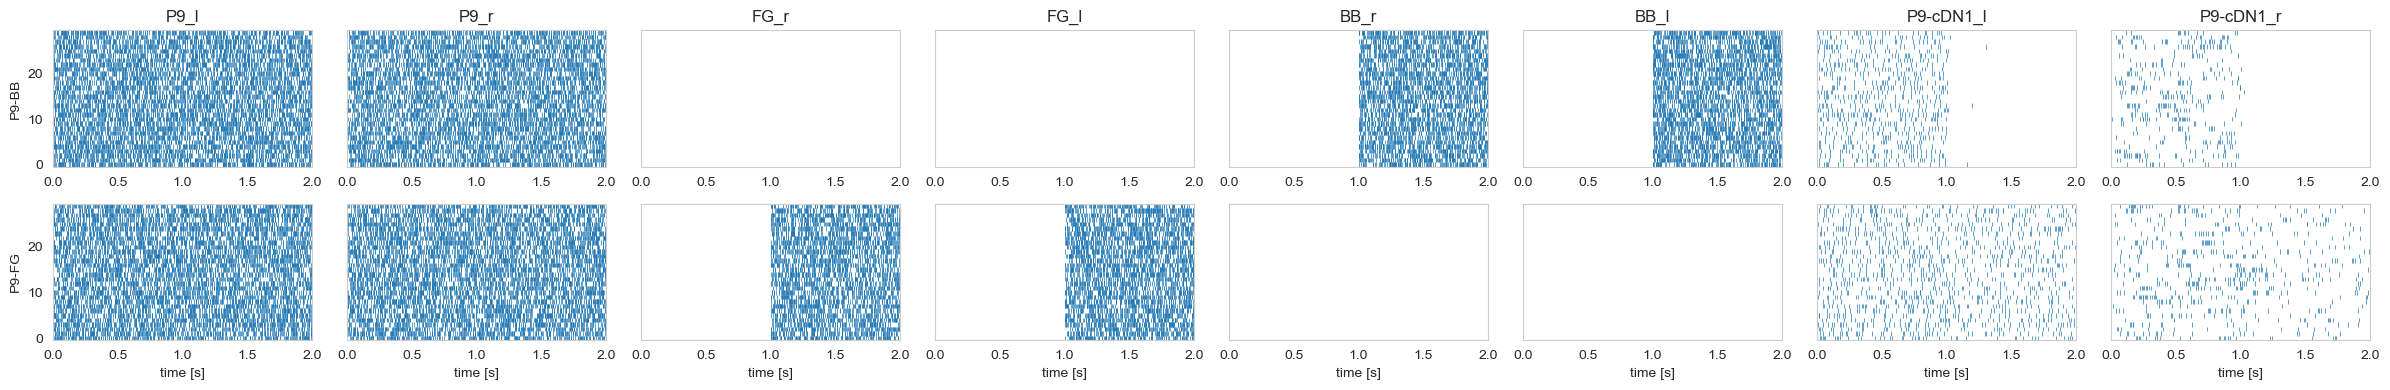

In [4]:
ps = [
    './results/dly/walk-stop/P9-FG.parquet',
    './results/dly/walk-stop/P9-BB.parquet'
]

neu = l_p9 + l_fg + l_bb + ['P9-cDN1_l', 'P9-cDN1_r']

df_spkt = utl.load_exps(ps)

utl.plot_raster(df_spkt, neu, name2flyid=name2flyid, xlims=(0, 2))

## rate line plots

INFO: setting figsize to (10, 4)


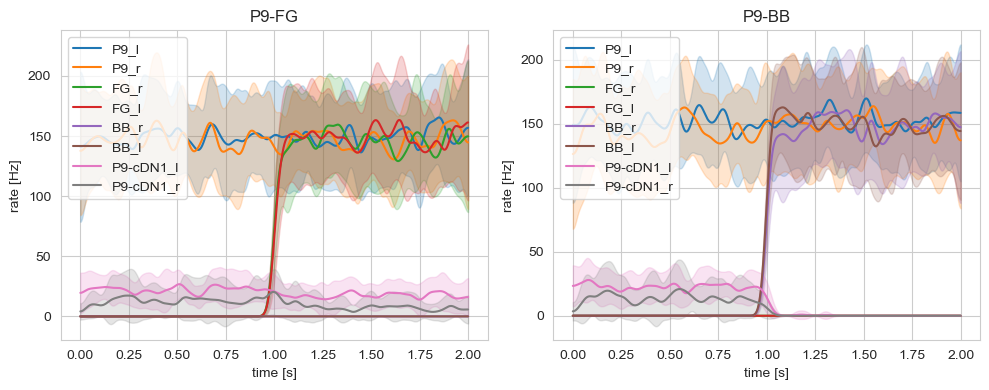

In [39]:
utl.plot_rate(df_spkt, neu, xlims=(0, 2), name2flyid=name2flyid, sigma=25)

## rate heat maps

INFO: setting figsize to (10, 3.0)


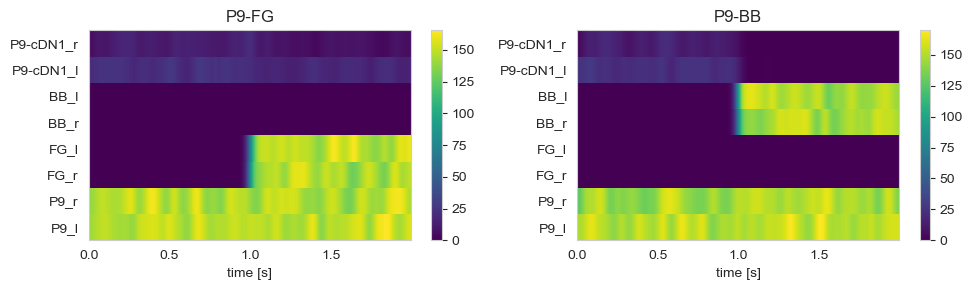

In [57]:
utl.plot_rate_heatmap(df_spkt, neu, xlims=(0, 2), name2flyid=name2flyid)

INFO: setting figsize to (10, 3.0)


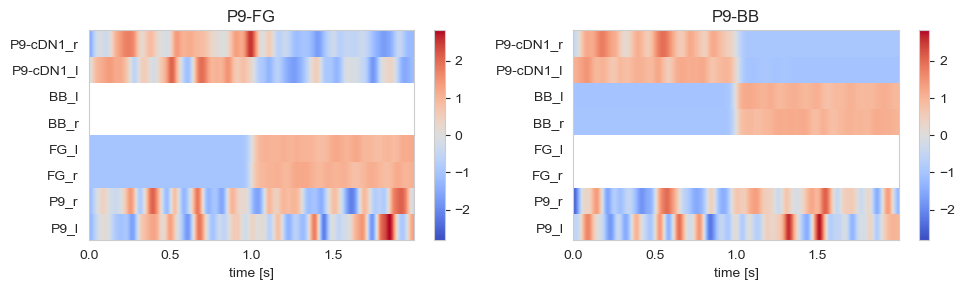

In [59]:
utl.plot_rate_heatmap(df_spkt, neu, xlims=(0, 2), name2flyid=name2flyid, do_zscore=True)

# Graphs

In [94]:
# load connectome into graph
G = utl.get_full_graph(path_comp, path_con)
print(len(G.nodes))

127400


In [95]:
path_exp = './results/coac/walk-walk/P9+MDN.parquet'
utl.write_graph(G, path_exp, name2flyid)

INFO: writing graph file results\coac\walk-walk\P9+MDN.gexf
